In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import networkx as nx
import random
from torch import tensor, Tensor
from utils.deepwalk import DeepwalkModel, train_deepwalk

In [17]:
EMBEDDING_SIZE = 2
WALK_LENGTH = 10
WALKS_PER_VERTEX = 10
WINDOW_SIZE = 3
INIT_LEARNING_RATE = 0.025
MIN_LR_RATE = 0.5

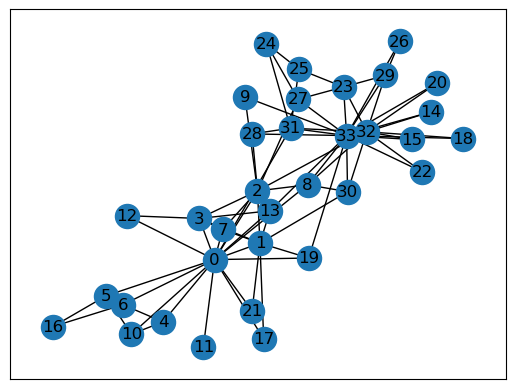

In [18]:
# Load dataset
g: nx.Graph = nx.karate_club_graph()
adj_lists = [list(g.neighbors(v)) for v in g]
vertices = list(g)
V = len(g)
nx.draw_networkx(g)

# 1D Embedding

Sắp xếp thứ tự lá của Hierarchical Softmax theo embedding 1D


In [19]:
# ánh xạ từ đỉnh -> vị trí lá
leaf_pos = list(range(V))

model = DeepwalkModel(V=V, emb_sz=1, leaf_pos=leaf_pos)
# optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(), lr=INIT_LEARNING_RATE)
lr_scheduler = torch.optim.lr_scheduler.LinearLR(
    optimizer, start_factor=1.0, end_factor=MIN_LR_RATE, total_iters=WALKS_PER_VERTEX
)
loss_records = []


train_deepwalk(
    model=model,
    optimizer=optimizer,
    vertices=vertices,
    adj_lists=adj_lists,
    loss_records=loss_records,
    scheduler=lr_scheduler,
    walk_len=WALK_LENGTH,
    walks_per_vertex=WALKS_PER_VERTEX,
    window_sz=WINDOW_SIZE,
)

model.share_memory()


Text(0.5, 1.0, 'Hàm mất mát theo thời gian')

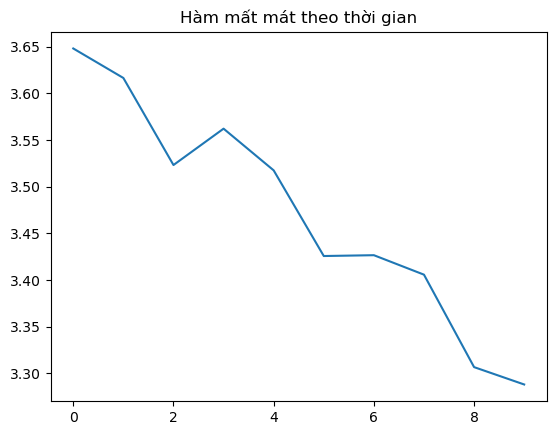

In [20]:
plt.tick_params("y")
plt.plot(loss_records)
plt.title("Hàm mất mát theo thời gian")


Cập nhật lại thứ tự lá cho Hierarchical Softmanx bằng embedding 1 chiều


In [23]:
pre_emb = model.embedding_layer(tensor(vertices)).flatten().tolist()
leaf_pos.sort(
    key=lambda x: pre_emb[x],
)
print(pre_emb)
print(leaf_pos)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


# n-D Embedding


In [24]:
model = DeepwalkModel(V=V, emb_sz=EMBEDDING_SIZE, leaf_pos=leaf_pos)
# optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(), lr=INIT_LEARNING_RATE)
lr_scheduler = torch.optim.lr_scheduler.LinearLR(
    optimizer, start_factor=1.0, end_factor=MIN_LR_RATE, total_iters=WALKS_PER_VERTEX
)
loss_records = []

train_deepwalk(
    model=model,
    optimizer=optimizer,
    vertices=vertices,
    adj_lists=adj_lists,
    loss_records=loss_records,
    scheduler=lr_scheduler,
    walk_len=WALK_LENGTH,
    walks_per_vertex=WALKS_PER_VERTEX,
    window_sz=WINDOW_SIZE,
)


Text(0.5, 1.0, 'Hàm mất mát theo thời gian')

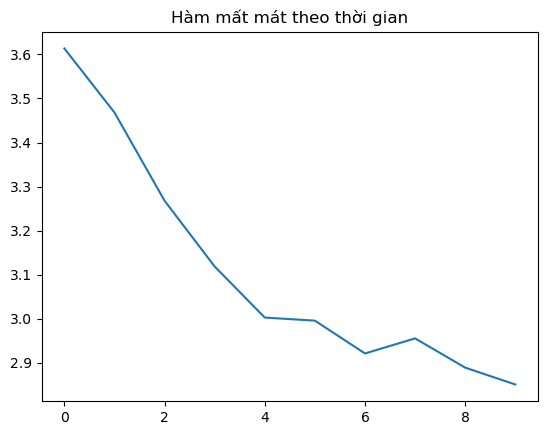

In [25]:
plt.tick_params("y")
plt.plot(loss_records)
plt.title("Hàm mất mát theo thời gian")

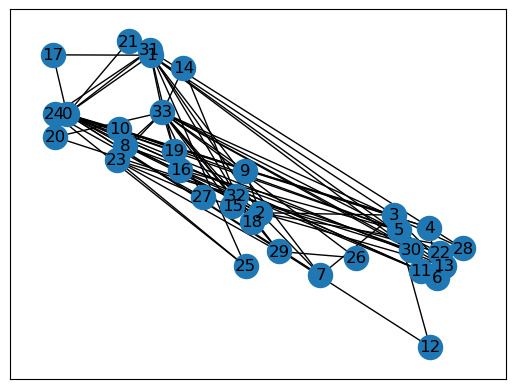

In [26]:
pos = {
    v: v_emb.tolist() for v, v_emb in enumerate(model.embedding_layer(tensor(vertices)))
}
nx.draw_networkx(g, pos)
